## 基本目標
1. 爬下文章，透過 jieba 等斷詞將文章拆解
2. 可以簡單的計算同樣文字出現的頻率
3. 將經常出現的 stop words 過濾掉之後對頻率進行排名
4. 將結果透過 wordcloud ⽂字雲的⽅式呈現

### 讀取爬取到的資料以及資料處理

In [15]:
# 載入取出資料所需要的套件
import pandas as pd
import ijson

In [24]:
# 讀取資料
file = 'Gossiping-20200220T06-34-35.json'
with open(file, 'r', encoding='utf-8') as f:
#     利用 ijson 進行多的迭代對象會出現錯誤，讀取時允許延遲，
# 參考: https://stackoverflow.com/questions/49141603/using-python-ijson-to-read-a-large-a-unique-json-file

    #     取得文章內容
    article_content = list(ijson.items(f, 'item.article_content')) # 將ijson返回的生成器轉換成list

with open(file, 'r', encoding='utf-8') as f:    
    #     取得文章回應數
    message_count_all = list(ijson.items(f, 'item.message_count.all'))

In [33]:
# 將文章內容和回應數合併
data = pd.Series(message_count_all, index = article_content)
print('original length:', len(data))
# 看2019下半年大多關心的事情，文章回應數小於500不採計
data = data[data > 500]
# 查看前五筆
data[:5]

original length: 392153


1.媒體來源:\n自由時報\n\n\n2.記者署名\n記者蕭玗欣台北報導\n\n\n3.完整新聞標題:\n工會幹部涉霸凌遭停飛 工會：長榮恐面臨和平協議中止後果\n\n4.完整新聞內文:\n記者蕭玗欣台北報導網路流傳長榮航空郭姓空服員在LINE群組疑似霸凌的言論，長\n榮航空今天表示將暫停該名組員飛行勤務。桃空職工理事廖以勤表示，郭姓組員至今仍未\n收到調離現職的消息，長榮航空此時放出這樣的消息等於是惡意挑起勞資對立，若公司堅\n持秋後算帳，繼續將棍子握在手中，就要面臨和平協議可能中止的後果。\n\n長榮航空空服員罷工雖落幕，但近日卻傳出桃空職工郭姓幹部在空服員LINE群組揚言要\n電爆罷工叛逃者、甚至說要在機師飛機餐加料；長榮航空今天證實，郭姓組員返回\n上班後將暫停其飛行勤務，改調地面勤務，等候調查。\n\n桃空職工理事廖以勤表示，和平協議的基礎是勞資雙方互信、互相給予的，若長榮航空堅\n持秋後算帳，就要面臨和平協議中止的後果；廖以勤也說，據她了解，郭姓幹部目前仍未\n接收到調離現職的消息，若長榮仍堅持要將棍子拿在手上、堅持威權的管理，等於是惡意\n挑起勞資對立，也違反勞動部長許銘春、桃園市長鄭文燦在簽定團協時所說的要回到新的\n勞資關係。\n\n廖以勤強調，長榮此舉賠上的是旅客及社會對企業形象的不信任，希望長榮航空要思考永\n續經營的重要性。\n\n5.完整新聞連結 (或短網址): https://news.ltn.com.tw/news/life/breakingnews/2846445 6.備註:\n\n\n廖以勤又要來罷工了嗎??\n\n工會說 要長榮 放棄威權 要民主\n\n結果他們這個工會 做的卻都是反的\n\n罷凌別人 投票 不公開開票 拿三寶 挖苦對方\n\n\n                                                                                                                                                                                                                                                      

In [34]:
# 篩選後長度
len(data)

5041

In [55]:
# 收集需要去做斷詞的文章
article_list = list(data.index)# 文章內容為series 的 index
# print(len(article_list))
# 查看前3筆
article_list[:3]

['1.媒體來源:\n自由時報\n\n\n2.記者署名\n記者蕭玗欣台北報導\n\n\n3.完整新聞標題:\n工會幹部涉霸凌遭停飛 工會：長榮恐面臨和平協議中止後果\n\n4.完整新聞內文:\n記者蕭玗欣台北報導網路流傳長榮航空郭姓空服員在LINE群組疑似霸凌的言論，長\n榮航空今天表示將暫停該名組員飛行勤務。桃空職工理事廖以勤表示，郭姓組員至今仍未\n收到調離現職的消息，長榮航空此時放出這樣的消息等於是惡意挑起勞資對立，若公司堅\n持秋後算帳，繼續將棍子握在手中，就要面臨和平協議可能中止的後果。\n\n長榮航空空服員罷工雖落幕，但近日卻傳出桃空職工郭姓幹部在空服員LINE群組揚言要\n電爆罷工叛逃者、甚至說要在機師飛機餐加料；長榮航空今天證實，郭姓組員返回\n上班後將暫停其飛行勤務，改調地面勤務，等候調查。\n\n桃空職工理事廖以勤表示，和平協議的基礎是勞資雙方互信、互相給予的，若長榮航空堅\n持秋後算帳，就要面臨和平協議中止的後果；廖以勤也說，據她了解，郭姓幹部目前仍未\n接收到調離現職的消息，若長榮仍堅持要將棍子拿在手上、堅持威權的管理，等於是惡意\n挑起勞資對立，也違反勞動部長許銘春、桃園市長鄭文燦在簽定團協時所說的要回到新的\n勞資關係。\n\n廖以勤強調，長榮此舉賠上的是旅客及社會對企業形象的不信任，希望長榮航空要思考永\n續經營的重要性。\n\n5.完整新聞連結 (或短網址): https://news.ltn.com.tw/news/life/breakingnews/2846445 6.備註:\n\n\n廖以勤又要來罷工了嗎??\n\n工會說 要長榮 放棄威權 要民主\n\n結果他們這個工會 做的卻都是反的\n\n罷凌別人 投票 不公開開票 拿三寶 挖苦對方\n\n\n',
 '何韻詩聯合國發言批一國兩制 中國代表兩度打斷\n\n最新更新：2019/07/08 22:30\n\n（中央社記者唐佩君布魯塞爾8日專電）香港歌手何韻詩今天在聯合國人權理事會對反\n送中事件發言，雖遭中國打斷兩次，但她指出一國兩制幾近死亡，呼籲人權理事會保護\n香港民眾，將不尊重人權的中國除名。\n\n人權理事會（UNHRC）自6月24日至7月12日在瑞士日內瓦召開會議，何韻詩在非政府人權\n組織聯合國觀察（UN Watch）和人權基金會（Human Rights Foun

In [160]:
# 文字雲所需套件
import jieba
import jieba.analyse
import operator
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Target1: 爬下文章，透過 jieba 等斷詞將文章拆解
### Target2: 簡單的計算同樣文字出現的頻率

In [76]:
# 爬下文章，透過 jieba 等斷詞將文章拆解，並用tf-idf方法進行關鍵字抽取
def keywords_extract(article_list):
    # 繁體詞庫  jieba.analyse.extract_tags
    jieba.set_dictionary('D:\dict.big.txt')
    #　自定義詞庫
    jieba.load_userdict("userdict.txt")
    # 儲存所有詞頻
    word_count = {}
    for article in article_list:
        # 每篇文章關鍵字抽取，抽取前五個(tf-idf方法)
        keyword_list = jieba.analyse.extract_tags(article, topK = 5)
        # 計算所有文章的關鍵字出現的頻率
        for keyword in keyword_list:
            # 在word_count中是否出現過
            if keyword in word_count: 
                word_count[keyword] += 1
            else:
                word_count[keyword] = 1
#     # 依照出現的頻率高低進行排序
    word_count = sorted(word_count.items(), key = lambda item : item[1], reverse = True)
    return word_count

In [171]:
word_count = keywords_extract(article_list)
# 前30名
word_count[:30]

Building prefix dict from D:\dict.big.txt ...
DEBUG:jieba:Building prefix dict from D:\dict.big.txt ...
Loading model from cache C:\Users\NONAME~1\AppData\Local\Temp\jieba.u04aeb134c535c5dae670907daed03128.cache
DEBUG:jieba:Loading model from cache C:\Users\NONAME~1\AppData\Local\Temp\jieba.u04aeb134c535c5dae670907daed03128.cache
Loading model cost 2.073 seconds.
DEBUG:jieba:Loading model cost 2.073 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


[('https', 963),
 ('台灣', 725),
 ('柯文哲', 601),
 ('com', 584),
 ('imgur', 473),
 ('中國', 438),
 ('韓國瑜', 357),
 ('jpg', 296),
 ('民進黨', 281),
 ('我們', 245),
 ('蔡英文', 237),
 ('總統', 223),
 ('沒有', 220),
 ('什麼', 199),
 ('新聞', 194),
 ('記者', 177),
 ('口罩', 164),
 ('現在', 163),
 ('立委', 142),
 ('國民黨', 138),
 ('市長', 126),
 ('黃國昌', 124),
 ('媒體', 121),
 ('一個', 119),
 ('香港', 115),
 ('他們', 111),
 ('美國', 110),
 ('武漢', 94),
 ('問題', 86),
 ('大陸', 84)]

In [172]:
# 因為文章中有超連結(圖片網址)，所以會取到，將英文和數字文字去除
import re
# 儲存符合的詞頻
word_count_filter = []
pattern = re.compile('[a-zA-Z0-9]') # 非國字
for word, count in word_count:
    if re.match(pattern, word) == None: # 匹配國字
        word_count_filter.append((word, count))

In [173]:
# 察看前30筆
word_count_filter[:30]

[('台灣', 725),
 ('柯文哲', 601),
 ('中國', 438),
 ('韓國瑜', 357),
 ('民進黨', 281),
 ('我們', 245),
 ('蔡英文', 237),
 ('總統', 223),
 ('沒有', 220),
 ('什麼', 199),
 ('新聞', 194),
 ('記者', 177),
 ('口罩', 164),
 ('現在', 163),
 ('立委', 142),
 ('國民黨', 138),
 ('市長', 126),
 ('黃國昌', 124),
 ('媒體', 121),
 ('一個', 119),
 ('香港', 115),
 ('他們', 111),
 ('美國', 110),
 ('武漢', 94),
 ('問題', 86),
 ('大陸', 84),
 ('網友', 84),
 ('時代力量', 82),
 ('還是', 74),
 ('因為', 69)]

### Target3: 將經常出現的 stop words 過濾掉之後對頻率進行排名

In [182]:
# 網路上下載的停用字檔案
file = 'stop_words.txt'
with open(file, 'r', encoding = 'utf-8') as f:
    stop_word_list = f.read().split('\n')
#  加入自己定義的停用詞
def add_stop_word(stop_word_list, user_stop_word): # 傳入由檔案讀入的停用字list和自己要定義的停用字
    for stop_word in user_stop_word:
        stop_word_list.append(stop_word)
    return stop_word_list 
user_stop_word = ['報導','新聞','記者', '其實', '不過', '現場', '推文','問卦', '甚麼','八卦',
                 '看板', '剛剛']
stop_word_list = add_stop_word(stop_word_list, user_stop_word)

In [183]:
# 儲存和過濾停用詞後的詞頻
new_word_count = []
# 和停用字進行比對過濾
for word, count in word_count_filter:
    if word not in stop_word_list:
        new_word_count.append((word, count))

In [184]:
# 查看結果
new_word_count

[('台灣', 725),
 ('柯文哲', 601),
 ('中國', 438),
 ('韓國瑜', 357),
 ('民進黨', 281),
 ('蔡英文', 237),
 ('總統', 223),
 ('口罩', 164),
 ('立委', 142),
 ('國民黨', 138),
 ('市長', 126),
 ('黃國昌', 124),
 ('媒體', 121),
 ('香港', 115),
 ('美國', 110),
 ('武漢', 94),
 ('大陸', 84),
 ('網友', 84),
 ('時代力量', 82),
 ('帳號', 66),
 ('民眾黨', 64),
 ('國家', 58),
 ('確診', 55),
 ('郭台銘', 53),
 ('韓粉', 52),
 ('選舉', 52),
 ('民調', 51),
 ('分區', 49),
 ('政黨', 48),
 ('柯粉', 46),
 ('市府', 46),
 ('學生', 45),
 ('武漢肺炎', 44),
 ('醫院', 43),
 ('隔離', 43),
 ('館長', 41),
 ('防疫', 38),
 ('時力', 37),
 ('名單', 35),
 ('高雄', 35),
 ('疫情', 34),
 ('議員', 33),
 ('中共', 31),
 ('蘇貞昌', 30),
 ('臺灣', 30),
 ('陳時中', 30),
 ('台商', 29),
 ('人員', 28),
 ('台北', 28),
 ('這種', 27),
 ('參選', 27),
 ('民眾', 27),
 ('水桶', 27),
 ('日本', 26),
 ('楊蕙如', 26),
 ('媽媽', 25),
 ('時間', 25),
 ('蔡壁', 25),
 ('醫師', 24),
 ('鄉民', 24),
 ('小英', 24),
 ('記者會', 23),
 ('調查', 23),
 ('蟑螂', 23),
 ('臉書', 23),
 ('兩岸', 23),
 ('陸委會', 23),
 ('討論', 22),
 ('台北市', 22),
 ('年輕人', 22),
 ('台灣民眾黨', 22),
 ('黨團', 22),
 ('高雄市', 21),
 ('國會', 21),


### Target4: 將結果透過 wordcloud 文字雲的方式呈現

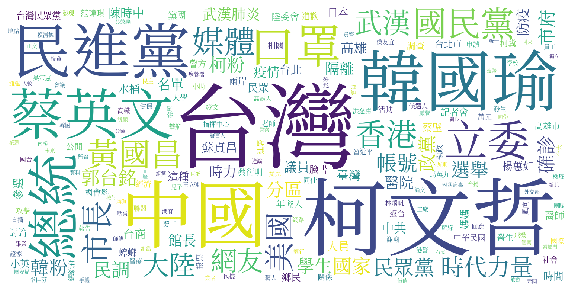

In [186]:
# 設定字體
font = r'D:\NotoSerifCJKtc-Regular.otf'
# 根據字詞頻率生成詞雲
wordcloud = WordCloud(background_color = 'white', width = 1500, height = 750, font_path = font,
                     mode = 'RGBA', min_font_size = 4)
wordcloud.generate_from_frequencies(dict(new_word_count))
#產生圖片
plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()